In [31]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# We import dblp from google drive
id='1bfZzGpT5jQwYuLHfdgPO_4JSLyPsIVBR'

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('globalterrorismdb_0919dist.xlsx')  
df_terrorism = pd.read_excel('globalterrorismdb_0919dist.xlsx',index_col='eventid')

In [34]:
df_terrorism.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [0]:
df_terrorism.to_csv('terrorism_df.csv')

In [36]:
print('Cardinality: ', len(df_terrorism))
print('Degree: ', len(df_terrorism.columns))

Cardinality:  191464
Degree:  134


In [37]:
df_terrorism.columns.tolist()

['iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 

In [0]:
df_europe = df_terrorism[df_terrorism.region_txt.str.contains('Europe')]

In [0]:
df_year2015=df_europe.loc[(df_europe['iyear'])>2015]

In [0]:
df_year2015=df_year2015.loc[(df_year2015['nkill'])>20]

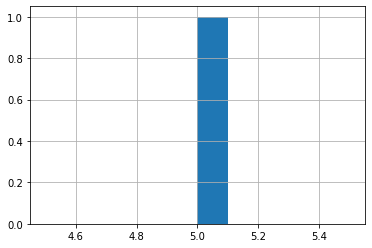

In [41]:
df_year2015[df_year2015.iyear==2017].imonth.hist()

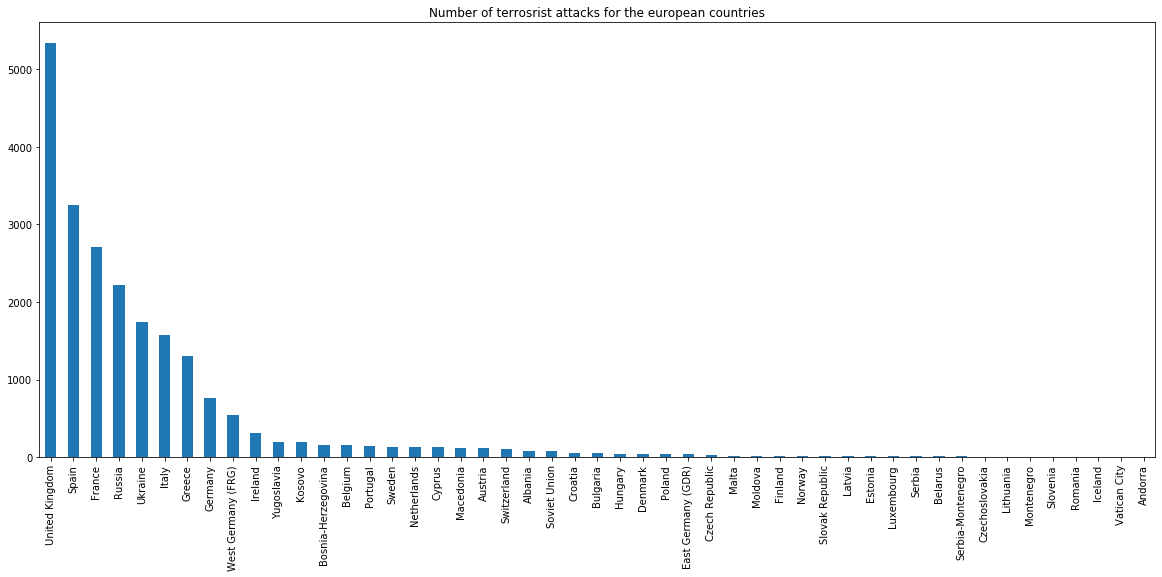

In [42]:
plt.figure(figsize=(20,8))
df_europe.country_txt.value_counts().plot(kind='bar')
plt.title('Number of terrosrist attacks for the european countries')
plt.show()

In [0]:
top20 = df_europe.country_txt.value_counts().index.tolist()[:20]

In [44]:
df_top20 = df_europe[df_europe.country_txt.str.contains('|'.join(top20))]
print('The top8 countries represent {:.2f} % of the total number of attacks'.format(len(df_top20)/len(df_europe)*100))

The top8 countries represent 96.48 % of the total number of attacks


/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


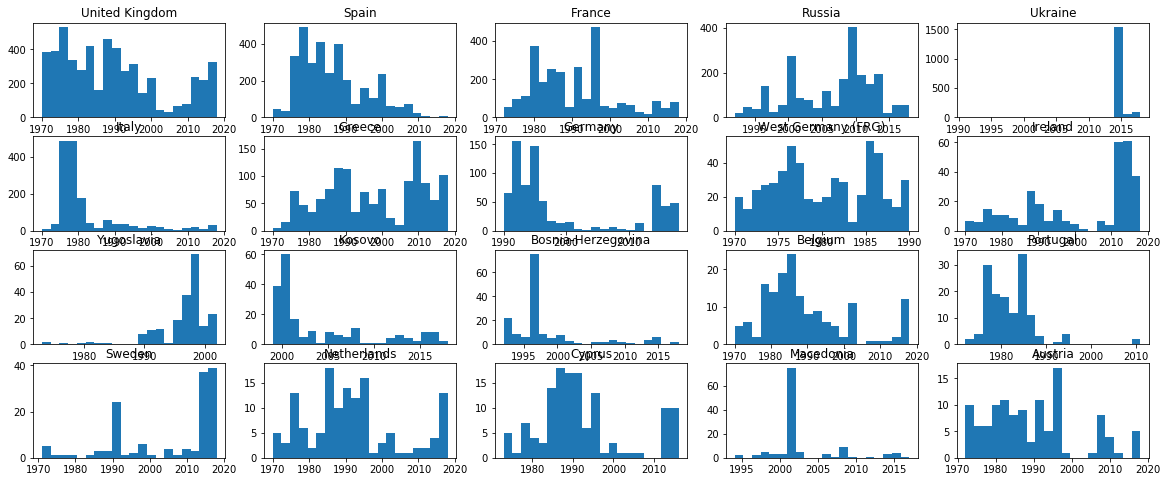

In [45]:
fig, axs = plt.subplots(4,5, figsize=(20, 8), facecolor='w', edgecolor='k')

for ax, country in zip(axs.ravel(),top20):
  df_top20[df_top20.country_txt == country].iyear.hist(ax=ax, grid=False,bins=20)
  ax.set_title(country)

In [46]:
df_top20.gname.value_counts().index.tolist()[:30]

['Unknown',
 'Irish Republican Army (IRA)',
 'Basque Fatherland and Freedom (ETA)',
 'Corsican National Liberation Front (FLNC)',
 "Donetsk People's Republic",
 'Protestant extremists',
 'Chechen Rebels',
 'Ulster Volunteer Force (UVF)',
 'Ulster Freedom Fighters (UFF)',
 'Neo-Nazi extremists',
 'Red Brigades',
 'First of October Antifascist Resistance Group (GRAPO)',
 "Luhansk People's Republic",
 "Kurdistan Workers' Party (PKK)",
 'Corsican National Liberation Front- Historic Channel',
 'Irish National Liberation Army (INLA)',
 'November 17 Revolutionary Organization (N17RO)',
 'Dissident Republicans',
 'Armenian Secret Army for the Liberation of Armenia',
 'Anarchists',
 'Irish Republican Extremists',
 'Separatists',
 "Revolutionary People's Struggle (ELA)",
 'Resistenza',
 'Red Army Faction (RAF)',
 'Corsican Separatists',
 'Terra Lliure',
 'Revolutionary Cells',
 'Prima Linea',
 'Kosovo Liberation Army (KLA)']

In [0]:
df_top20=df_top20.set_index("gname")

In [0]:
remloc2=["Unknown","Irish Republican Army (IRA)","Irish National Liberation Army (INLA)","Basque Fatherland and Freedom (ETA)","Corsican National Liberation Front (FLNC)","Kosovo Liberation Army (KLA)","Corsican National Liberation Front- Historic Channel",
        "Corsican National Liberation Front- Historic Channel","Irish National Liberation Army (INLA)"]
remloc=["Unknown"]

In [0]:
df_top20 = df_top20.drop(remloc, axis=0)

In [0]:
df_top20=df_top20.reset_index()

In [0]:
grp=df_top20.gname.value_counts().index.tolist()[:30]

In [0]:
df_fr=df_top20[df_top20.country_txt == 'France']

In [0]:
top30 = df_top20.provstate.value_counts().index.tolist()[:30]

In [0]:
df_europe30 = df_top20[df_top20.provstate.str.contains('|'.join(top30))]

In [55]:
df_europe30.gname.value_counts().index.tolist()

['Irish Republican Army (IRA)',
 'Basque Fatherland and Freedom (ETA)',
 "Donetsk People's Republic",
 'Corsican National Liberation Front (FLNC)',
 'Protestant extremists',
 'Chechen Rebels',
 'Ulster Volunteer Force (UVF)',
 'Ulster Freedom Fighters (UFF)',
 "Luhansk People's Republic",
 'First of October Antifascist Resistance Group (GRAPO)',
 'Red Brigades',
 'Corsican National Liberation Front- Historic Channel',
 'Irish National Liberation Army (INLA)',
 'November 17 Revolutionary Organization (N17RO)',
 'Dissident Republicans',
 'Irish Republican Extremists',
 "Kurdistan Workers' Party (PKK)",
 'Armenian Secret Army for the Liberation of Armenia',
 'Separatists',
 "Revolutionary People's Struggle (ELA)",
 'Resistenza',
 'Anarchists',
 'Neo-Nazi extremists',
 'Terra Lliure',
 'Iparretarrak (IK)',
 'Conspiracy of Cells of Fire',
 'Action Directe',
 'Corsican Separatists',
 'Oglaigh na hEireann',
 "Free Galician People's Guerrilla Army",
 'The New Irish Republican Army',
 'Revoluti

In [0]:
grp2=df_europe30.gname.value_counts().index.tolist()

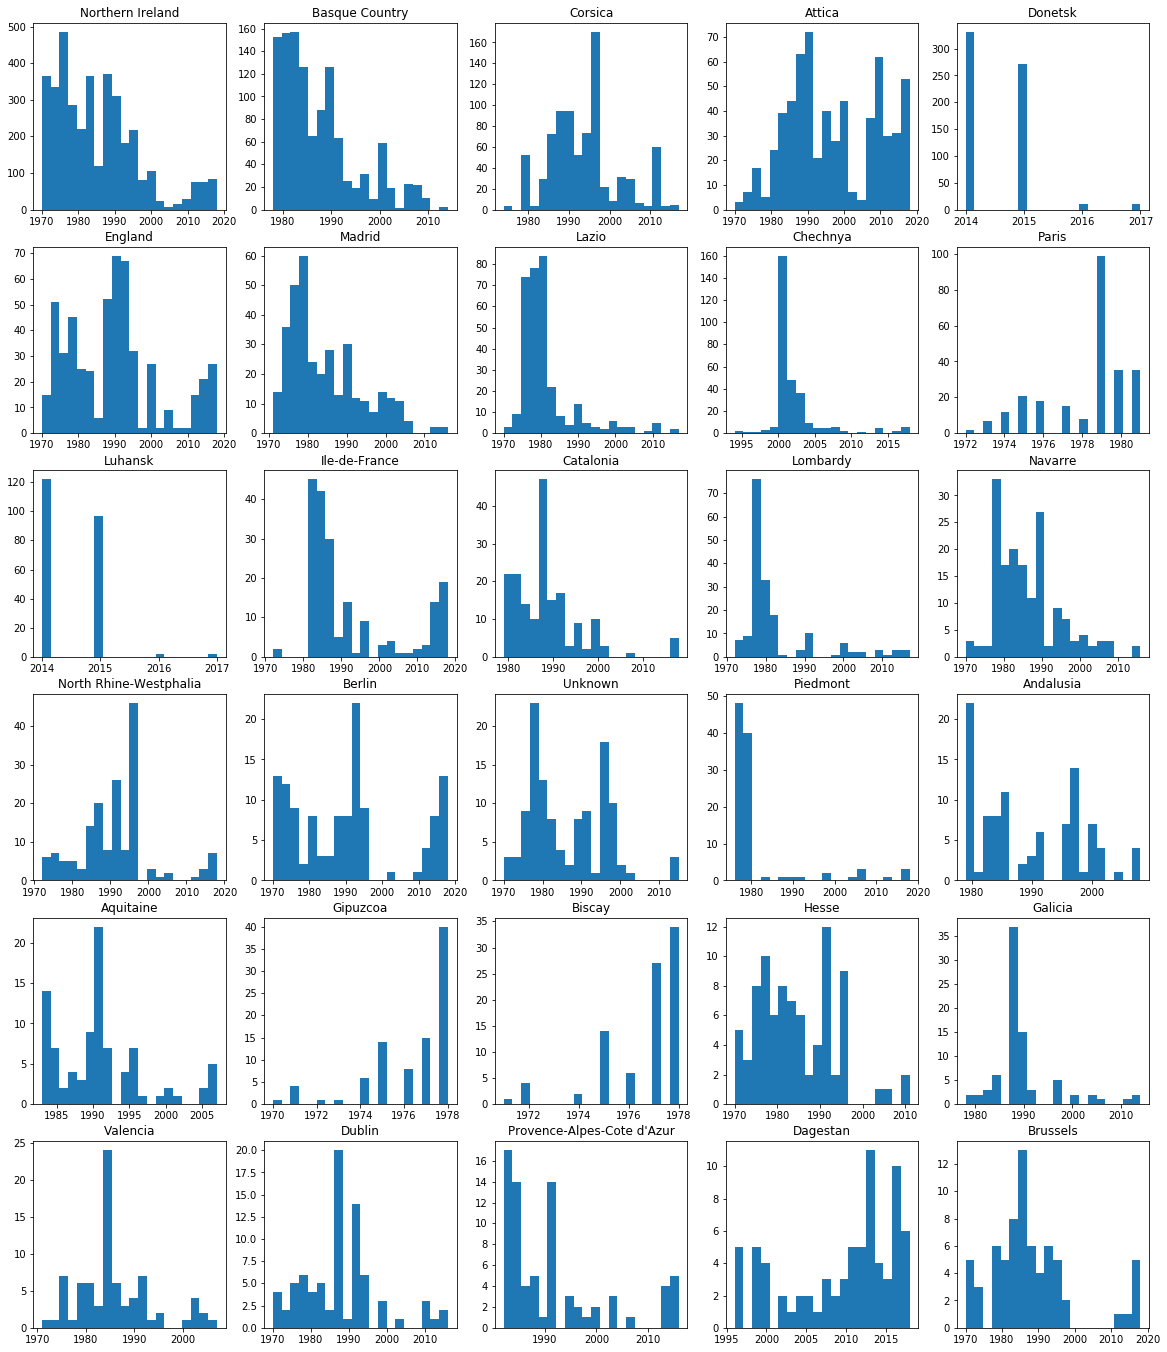

In [57]:
fig, axs = plt.subplots(6,5, figsize=(20, 24), facecolor='w', edgecolor='k')

for ax ,prov in zip(axs.ravel(),top30):
  df_europe30[df_europe30.provstate == prov].iyear.hist(ax=ax,grid=False,bins=20)
  ax.set_title(prov)

In [58]:
df_grp = df_europe30[df_europe30.gname.str.contains('|'.join(grp2))]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [0]:
#df_grp=df_grp.loc[(df_grp['nkill']+df_grp['nwound'])>10]
grp3=df_grp.gname.value_counts().index.tolist()

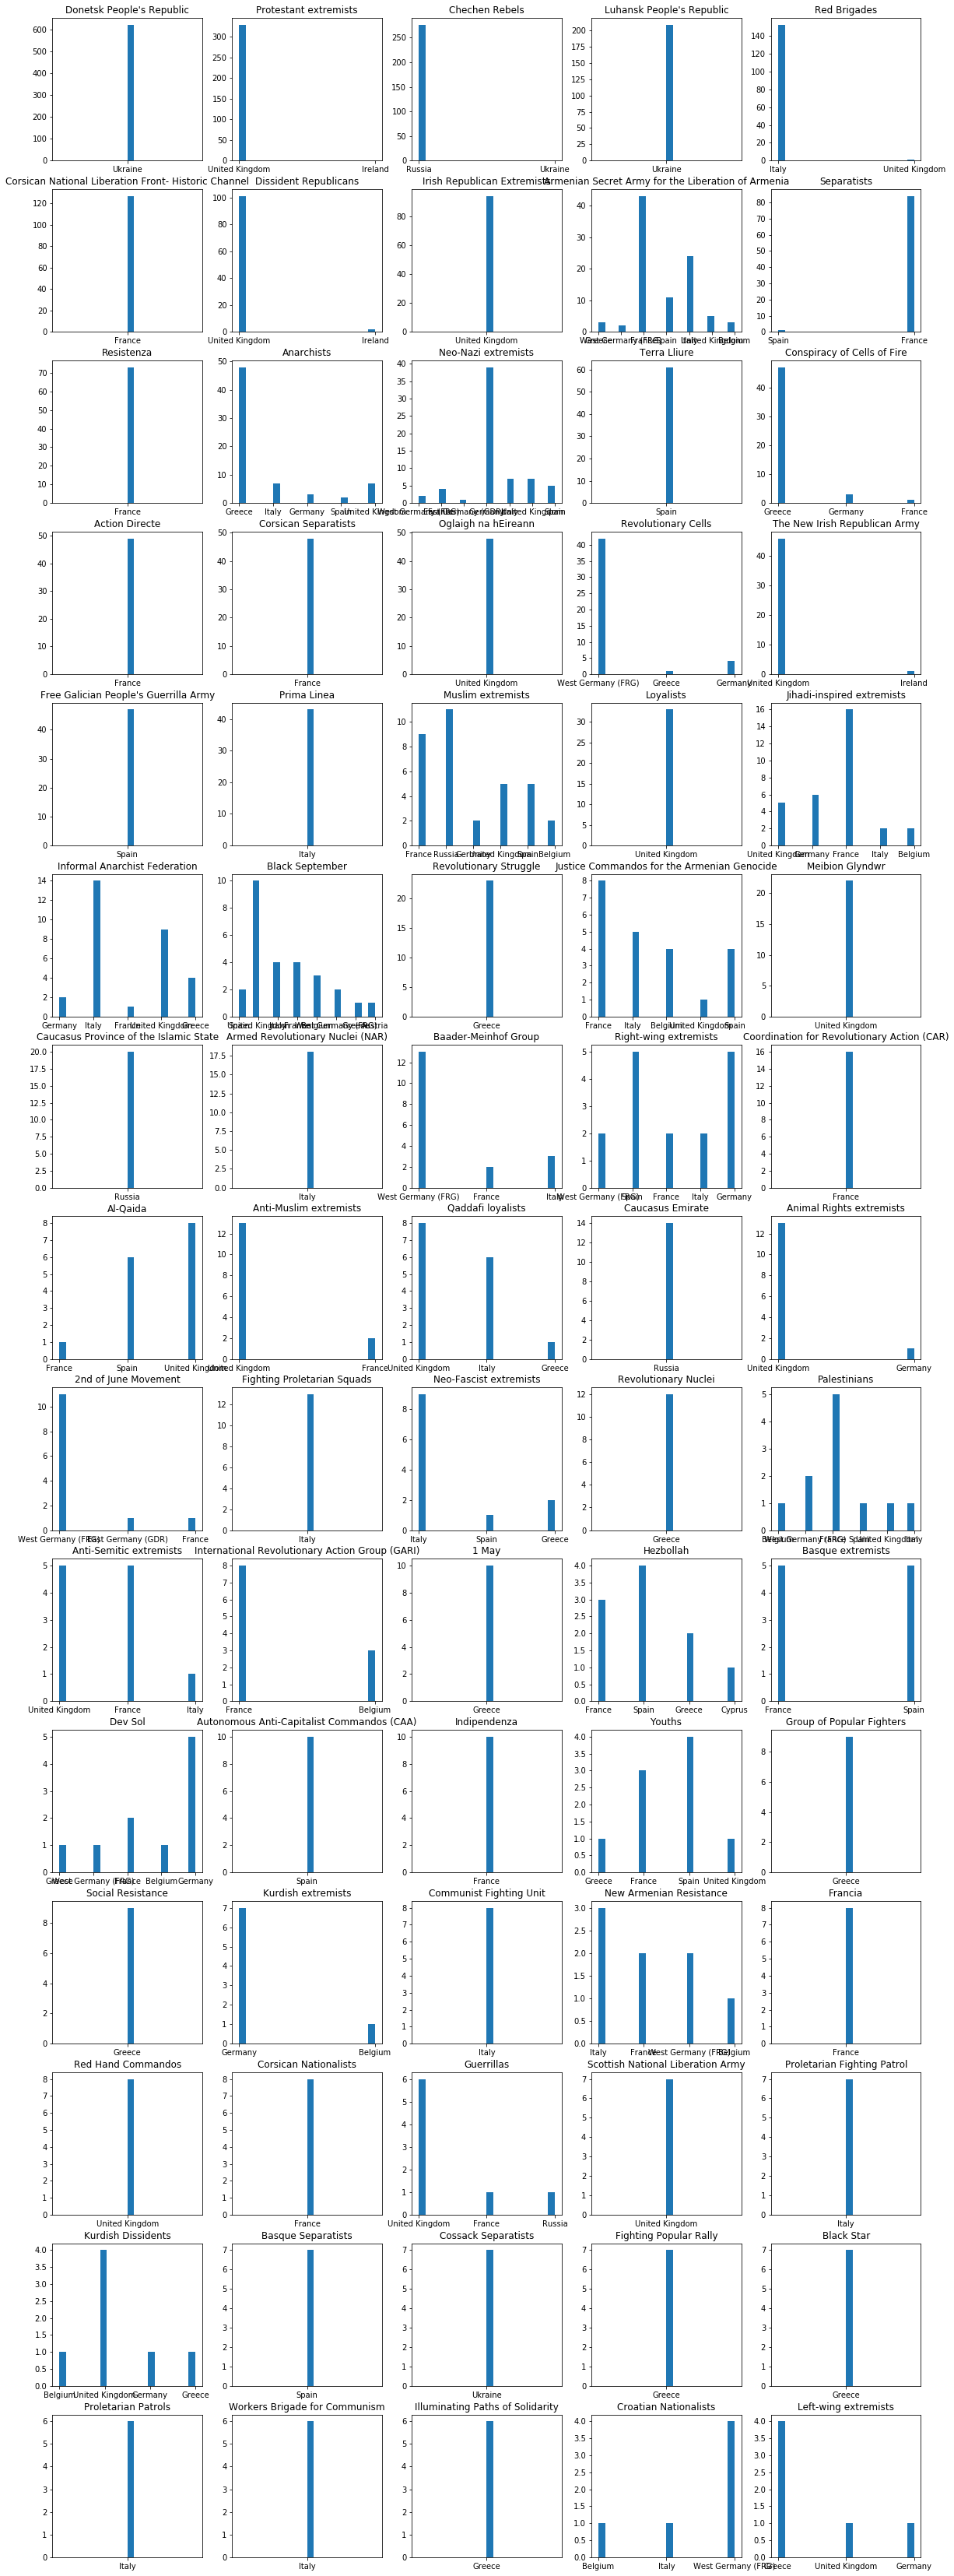

In [60]:
fig, axs = plt.subplots(15,5, figsize=(20, 60), facecolor='w', edgecolor='k')

for ax ,gr in zip(axs.ravel(),grp3):
  df_grp[df_grp.gname == gr].country_txt.hist(ax=ax,grid=False,bins=20)
  ax.set_title(gr)

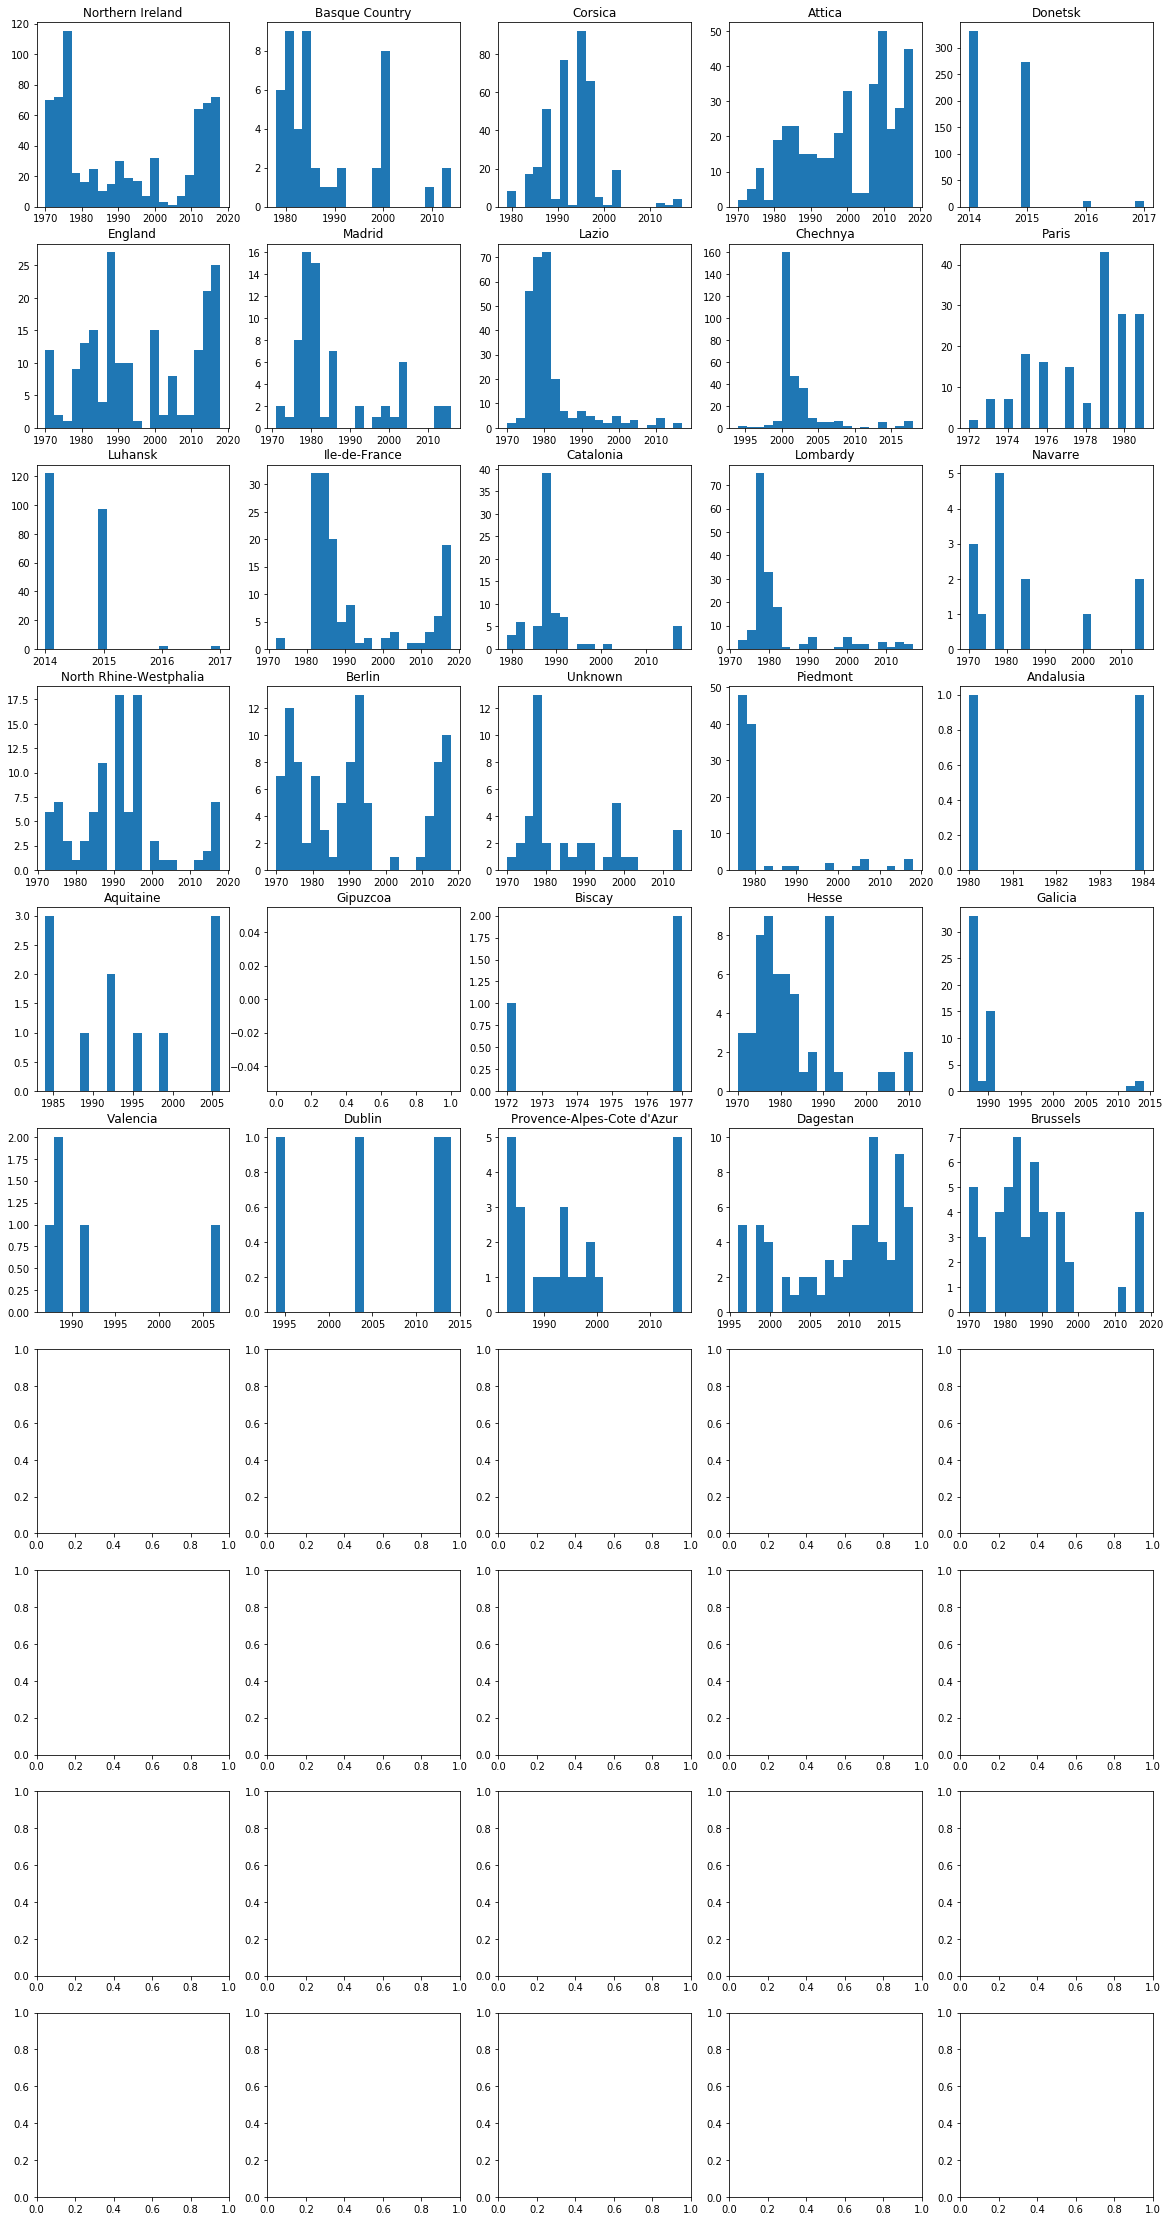

In [62]:
fig, axs = plt.subplots(10,5, figsize=(20, 40), facecolor='w', edgecolor='k')

for ax ,prov in zip(axs.ravel(),top30):
  df_grp[df_grp.provstate == prov].iyear.hist(ax=ax,grid=False,bins=20)
  ax.set_title(prov)

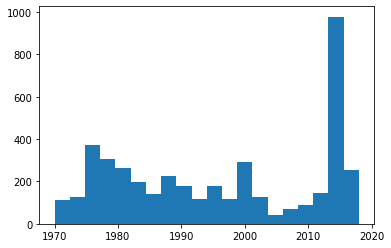

In [63]:
 df_grp.iyear.hist(grid=False,bins=20)

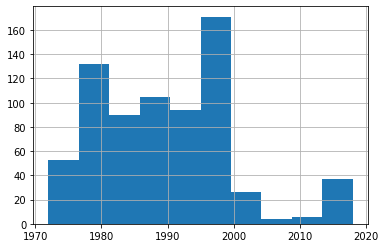

In [64]:
df_grp[df_grp.country_txt=='France'].iyear.hist()

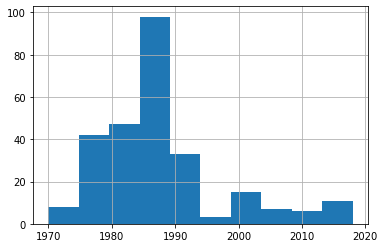

In [65]:
df_grp[df_grp.country_txt=='Spain'].iyear.hist()

In [71]:
gnames = []
for gname, group in df_grp.groupby('gname'):
  if group.country_txt.nunique() > 3:
    gnames.append(gname)

df_grp = df_grp[df_grp.gname.isin(gnames)]
df_grp.head()

,gname,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
79,Black September,1971,8,24,NaN,0,NaT,185,Spain,8,Western Europe,Madrid,Madrid,40.465595,-3.696263,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Jordanian Alia Airliner,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),60000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
142,Black September,1971,12,15,NaN,0,NaT,603,United Kingdom,8,Western Europe,England,London,51.504387,-0.140041,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Jordanian Govt,Jordanian Ambassador,...,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
346,Black September,1972,8,16,NaN,0,NaT,98,Italy,8,Western Europe,Lazio,Rome,41.890961,12.490069,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,el al acft,...,NaN,NaN,Explosive,0.0,NaN,NaN,4.0,NaN,NaN,1,3.0,Minor (likely < $1 million),50000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
376,Palestinians,1972,9,11,NaN,0,NaT,21,Belgium,8,Western Europe,Brussels,Brussels,50.836426,4.367415,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,0,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Israili govt,Diplomat Ophir Zadok,...,NaN,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN
382,Black September,1972,9,19,NaN,0,NaT,603,United Kingdom,8,Western Europe,England,London,51.504387,-0.140041,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,Israeli Ministry of Foreign Affairs,Agricultural Affairs Counselor: Dr. Ami Shachori,...,NaN,NaN,Letter bomb,1.0,0.0,0.0,1.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,"197209190001, 197209190002, 197209190003, 1972..."


In [0]:
grp4=df_grp.gname.value_counts().index.tolist()

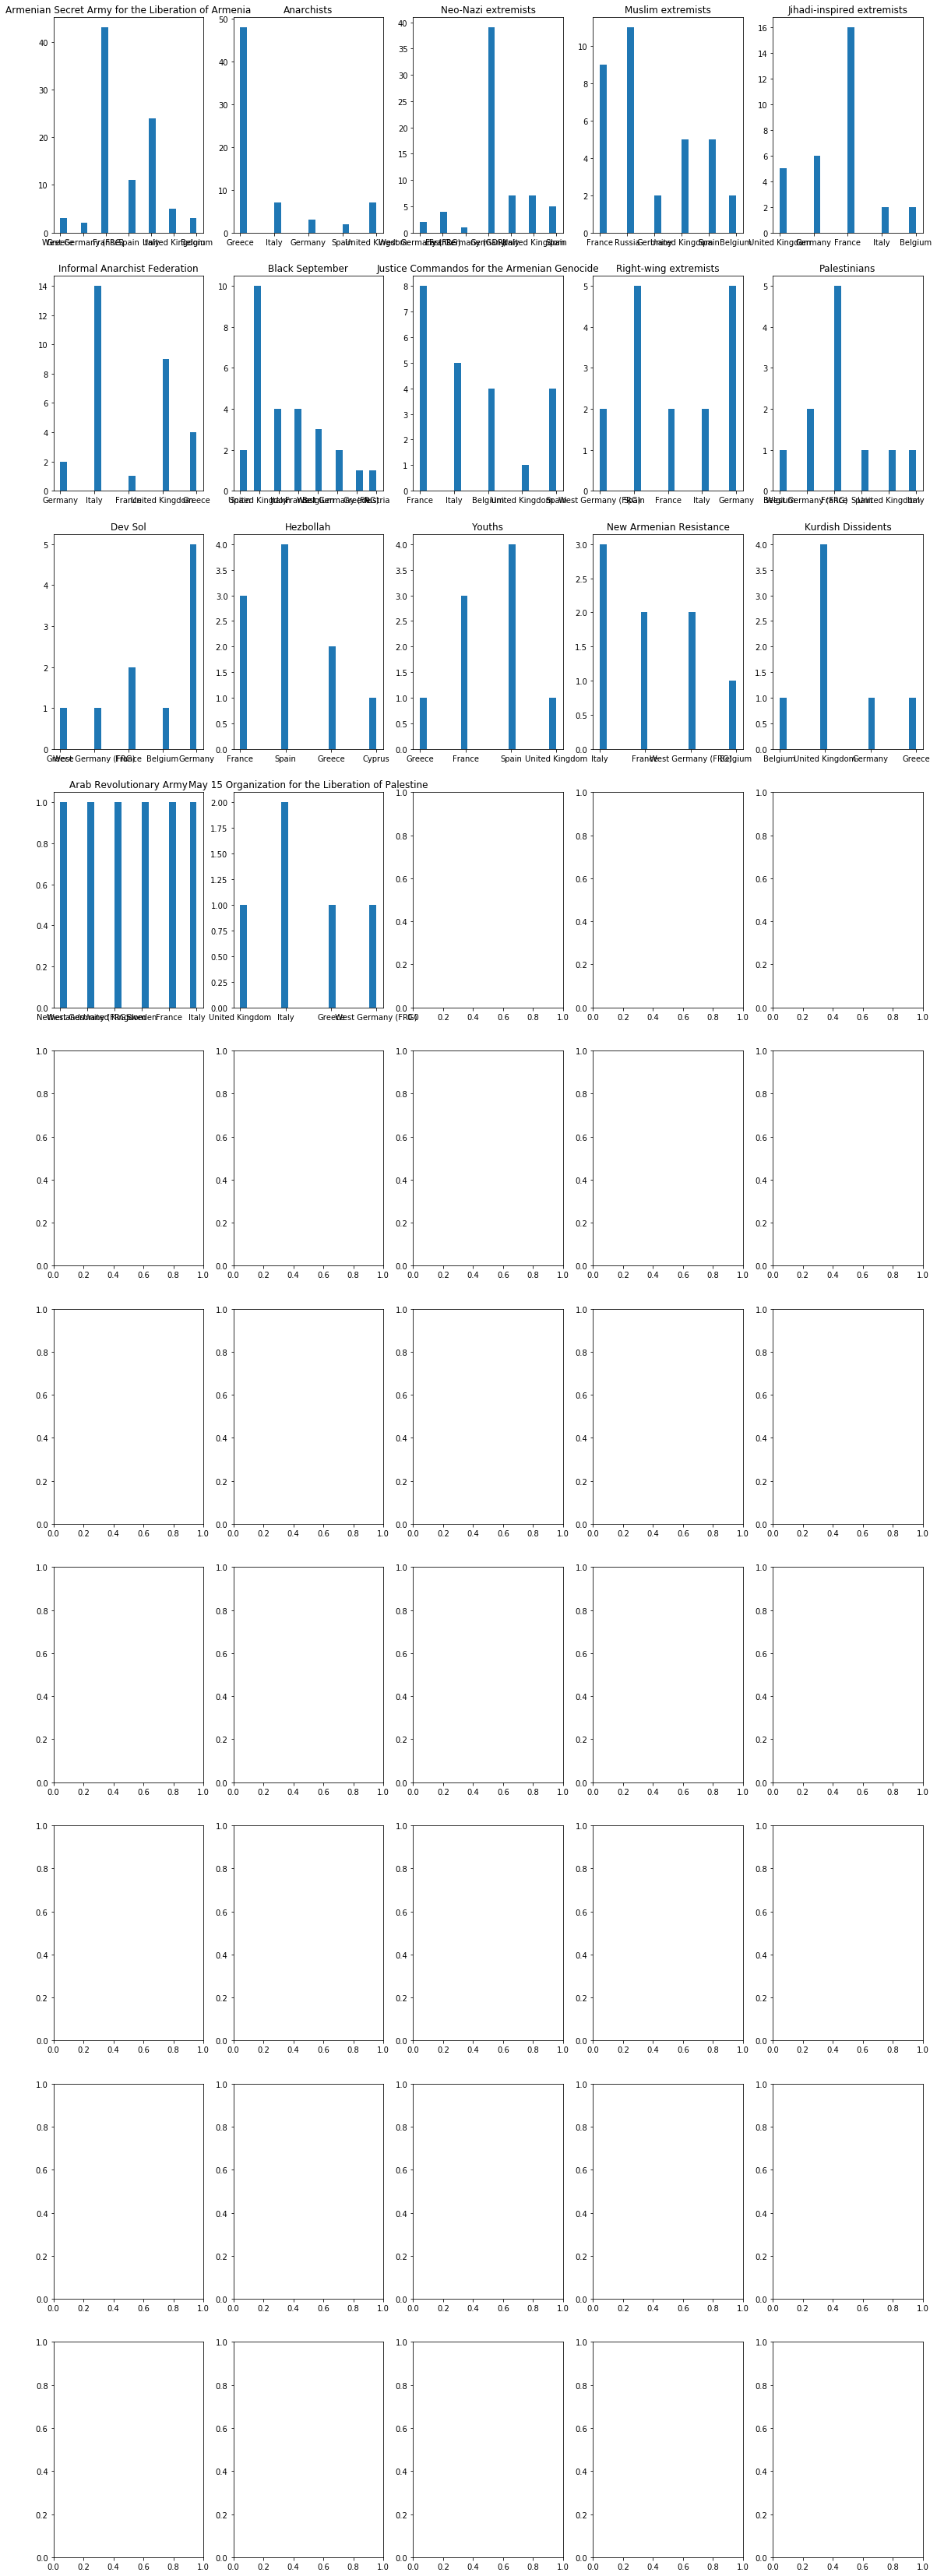

In [73]:
fig, axs = plt.subplots(10,5, figsize=(20, 60), facecolor='w', edgecolor='k')

for ax ,gr in zip(axs.ravel(),grp4):
  df_grp[df_grp.gname == gr].country_txt.hist(ax=ax,grid=False,bins=20)
  ax.set_title(gr)

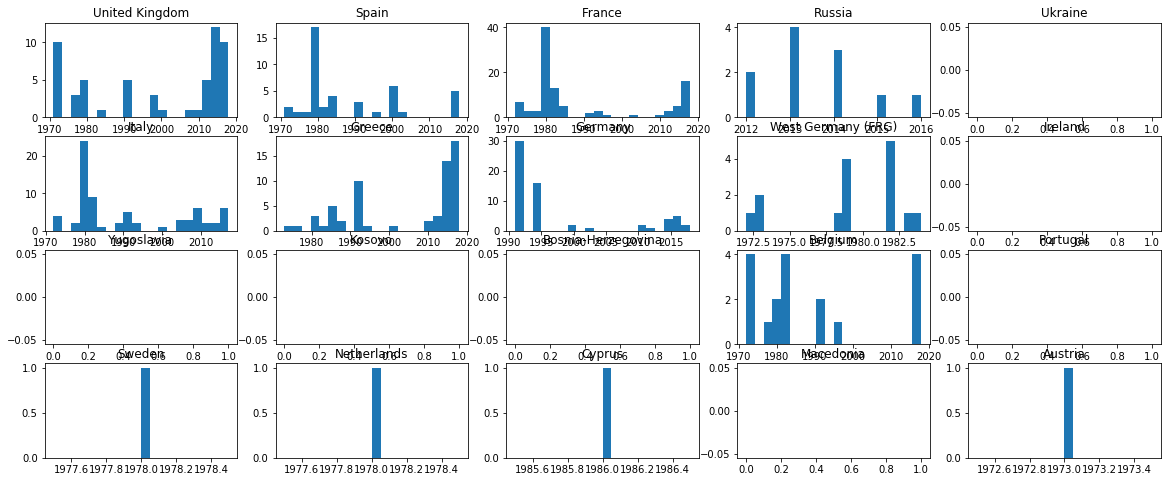

In [74]:
fig, axs = plt.subplots(4,5, figsize=(20, 8), facecolor='w', edgecolor='k')

for ax, country in zip(axs.ravel(),top20):
  df_grp[df_grp.country_txt == country].iyear.hist(ax=ax, grid=False,bins=20)
  ax.set_title(country)

In [0]:
df_tour=pd.read_csv('international-tourism-number-of-arrivals.csv')

In [83]:
df_tour.head()

,Entity,Code,Year,Unnamed: 3
0,Albania,ALB,1995,304000.0
1,Albania,ALB,1996,287000.0
2,Albania,ALB,1997,119000.0
3,Albania,ALB,1998,184000.0
4,Albania,ALB,1999,371000.0


In [0]:
df_tour.rename(columns={'Entity':'country','Unnamed: 3':'nbtour'},inplace=True)

In [85]:
df_tour.head()

,country,Code,Year,nbtour
0,Albania,ALB,1995,304000.0
1,Albania,ALB,1996,287000.0
2,Albania,ALB,1997,119000.0
3,Albania,ALB,1998,184000.0
4,Albania,ALB,1999,371000.0


In [86]:
df_tour = df_tour[df_tour.country.str.contains('|'.join(top20))]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [88]:
df_tour

,country,Code,Year,nbtour
235,Austria,AUT,1995,17173000.0
236,Austria,AUT,1996,17090000.0
237,Austria,AUT,1997,16647000.0
238,Austria,AUT,1998,17352000.0
239,Austria,AUT,1999,17467000.0
...,...,...,...,...
4947,United Kingdom,GBR,2012,29282000.0
4948,United Kingdom,GBR,2013,31063000.0
4949,United Kingdom,GBR,2014,32613000.0
4950,United Kingdom,GBR,2015,34436000.0


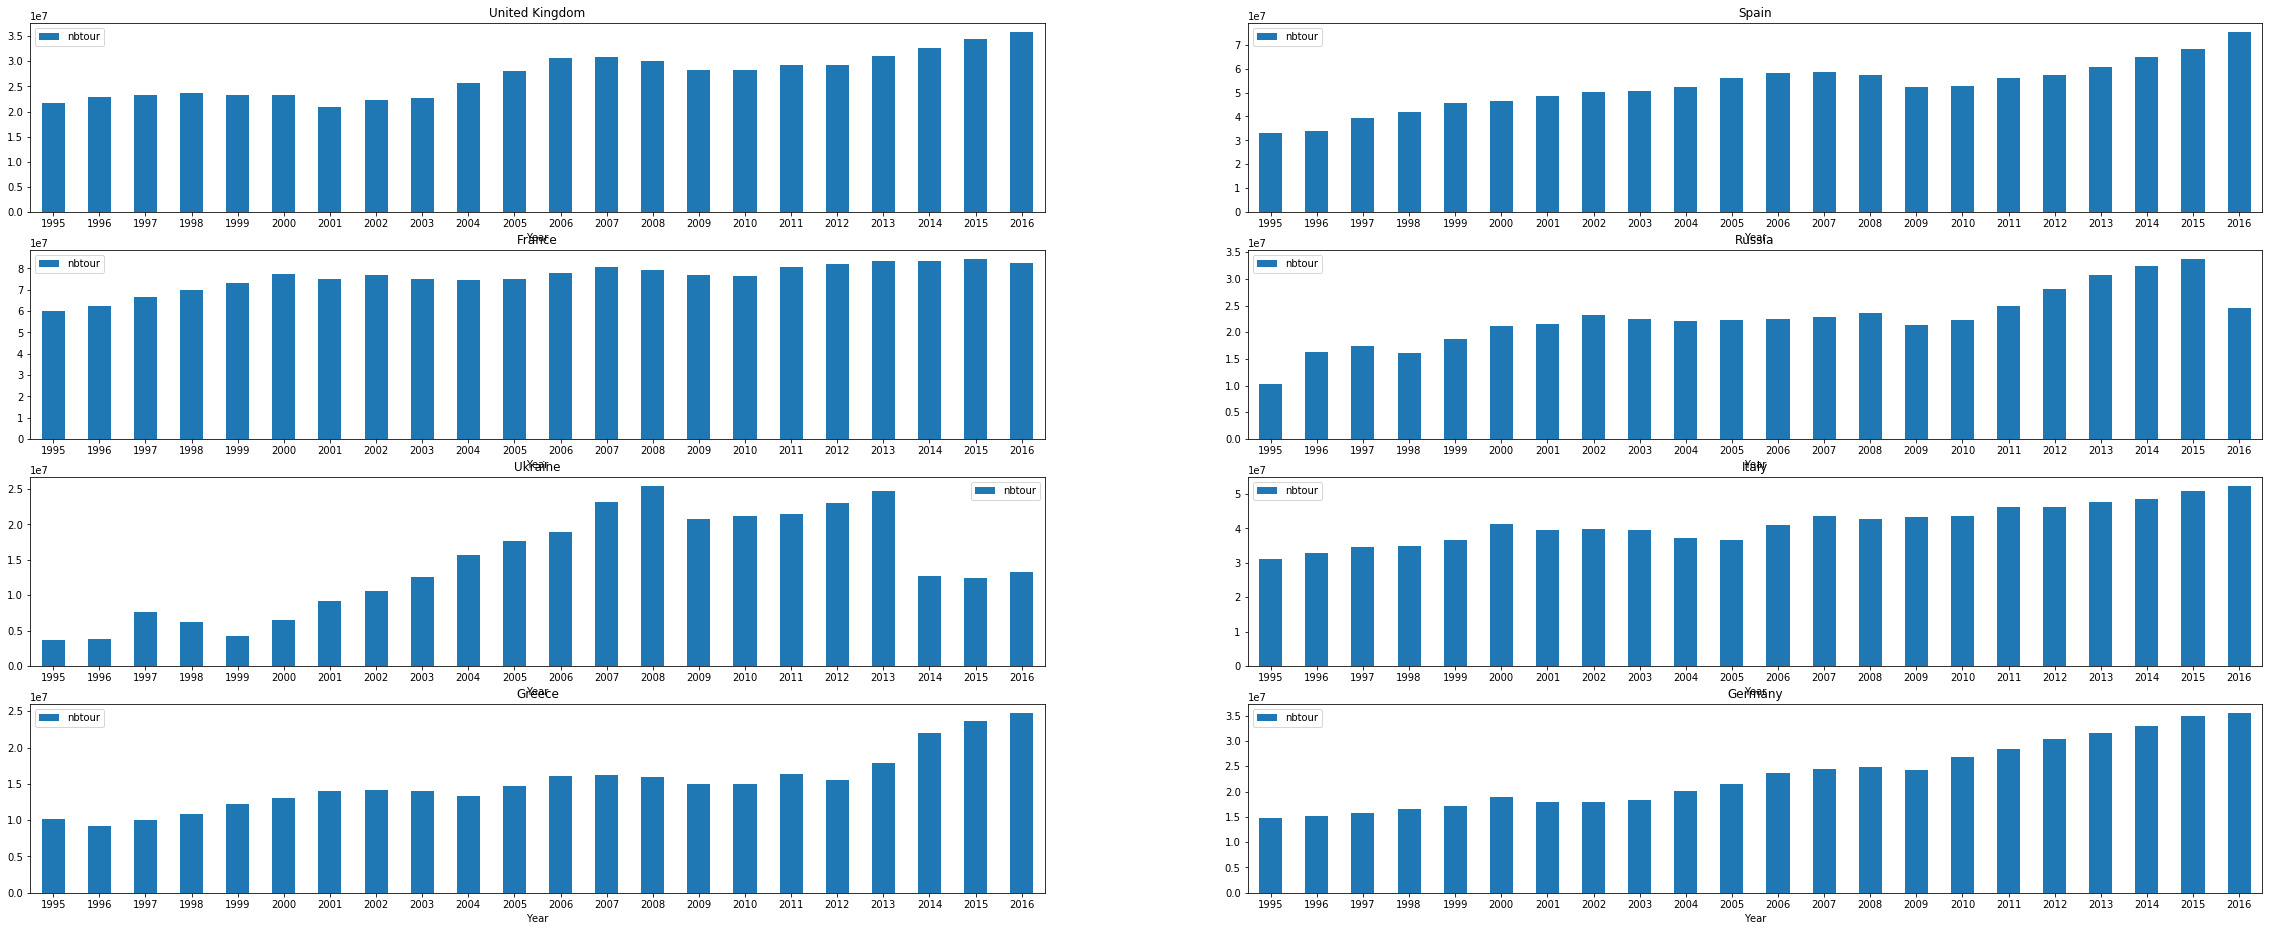

In [104]:
fig, axs = plt.subplots(4,2, figsize=(40, 16), facecolor='w', edgecolor='k')

for ax, count in zip(axs.ravel(),top20):
  df_tour[df_tour.country == count].plot.bar('Year','nbtour',rot=0,ax=ax)
  ax.set_title(count) 

In [109]:
df_grp2 = df_europe30[df_europe30.gname.str.contains('|'.join(grp2))]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [0]:
df_grp2=df_grp2.loc[(df_grp2['nkill']+df_grp2['nwound'])>30]

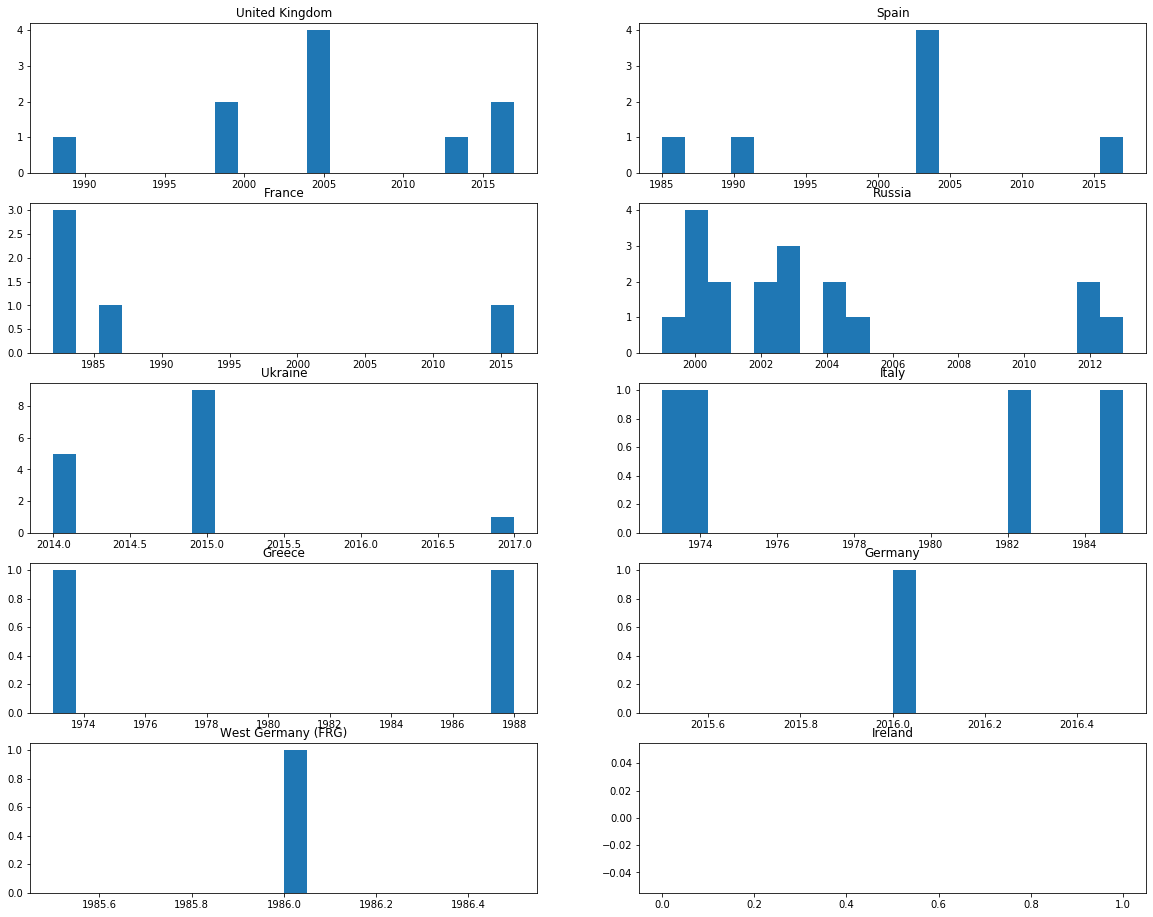

In [113]:
fig, axs = plt.subplots(5,2, figsize=(20, 16), facecolor='w', edgecolor='k')

for ax, country in zip(axs.ravel(),top20):
  df_grp2[df_grp2.country_txt == country].iyear.hist(ax=ax, grid=False,bins=20)
  ax.set_title(country)

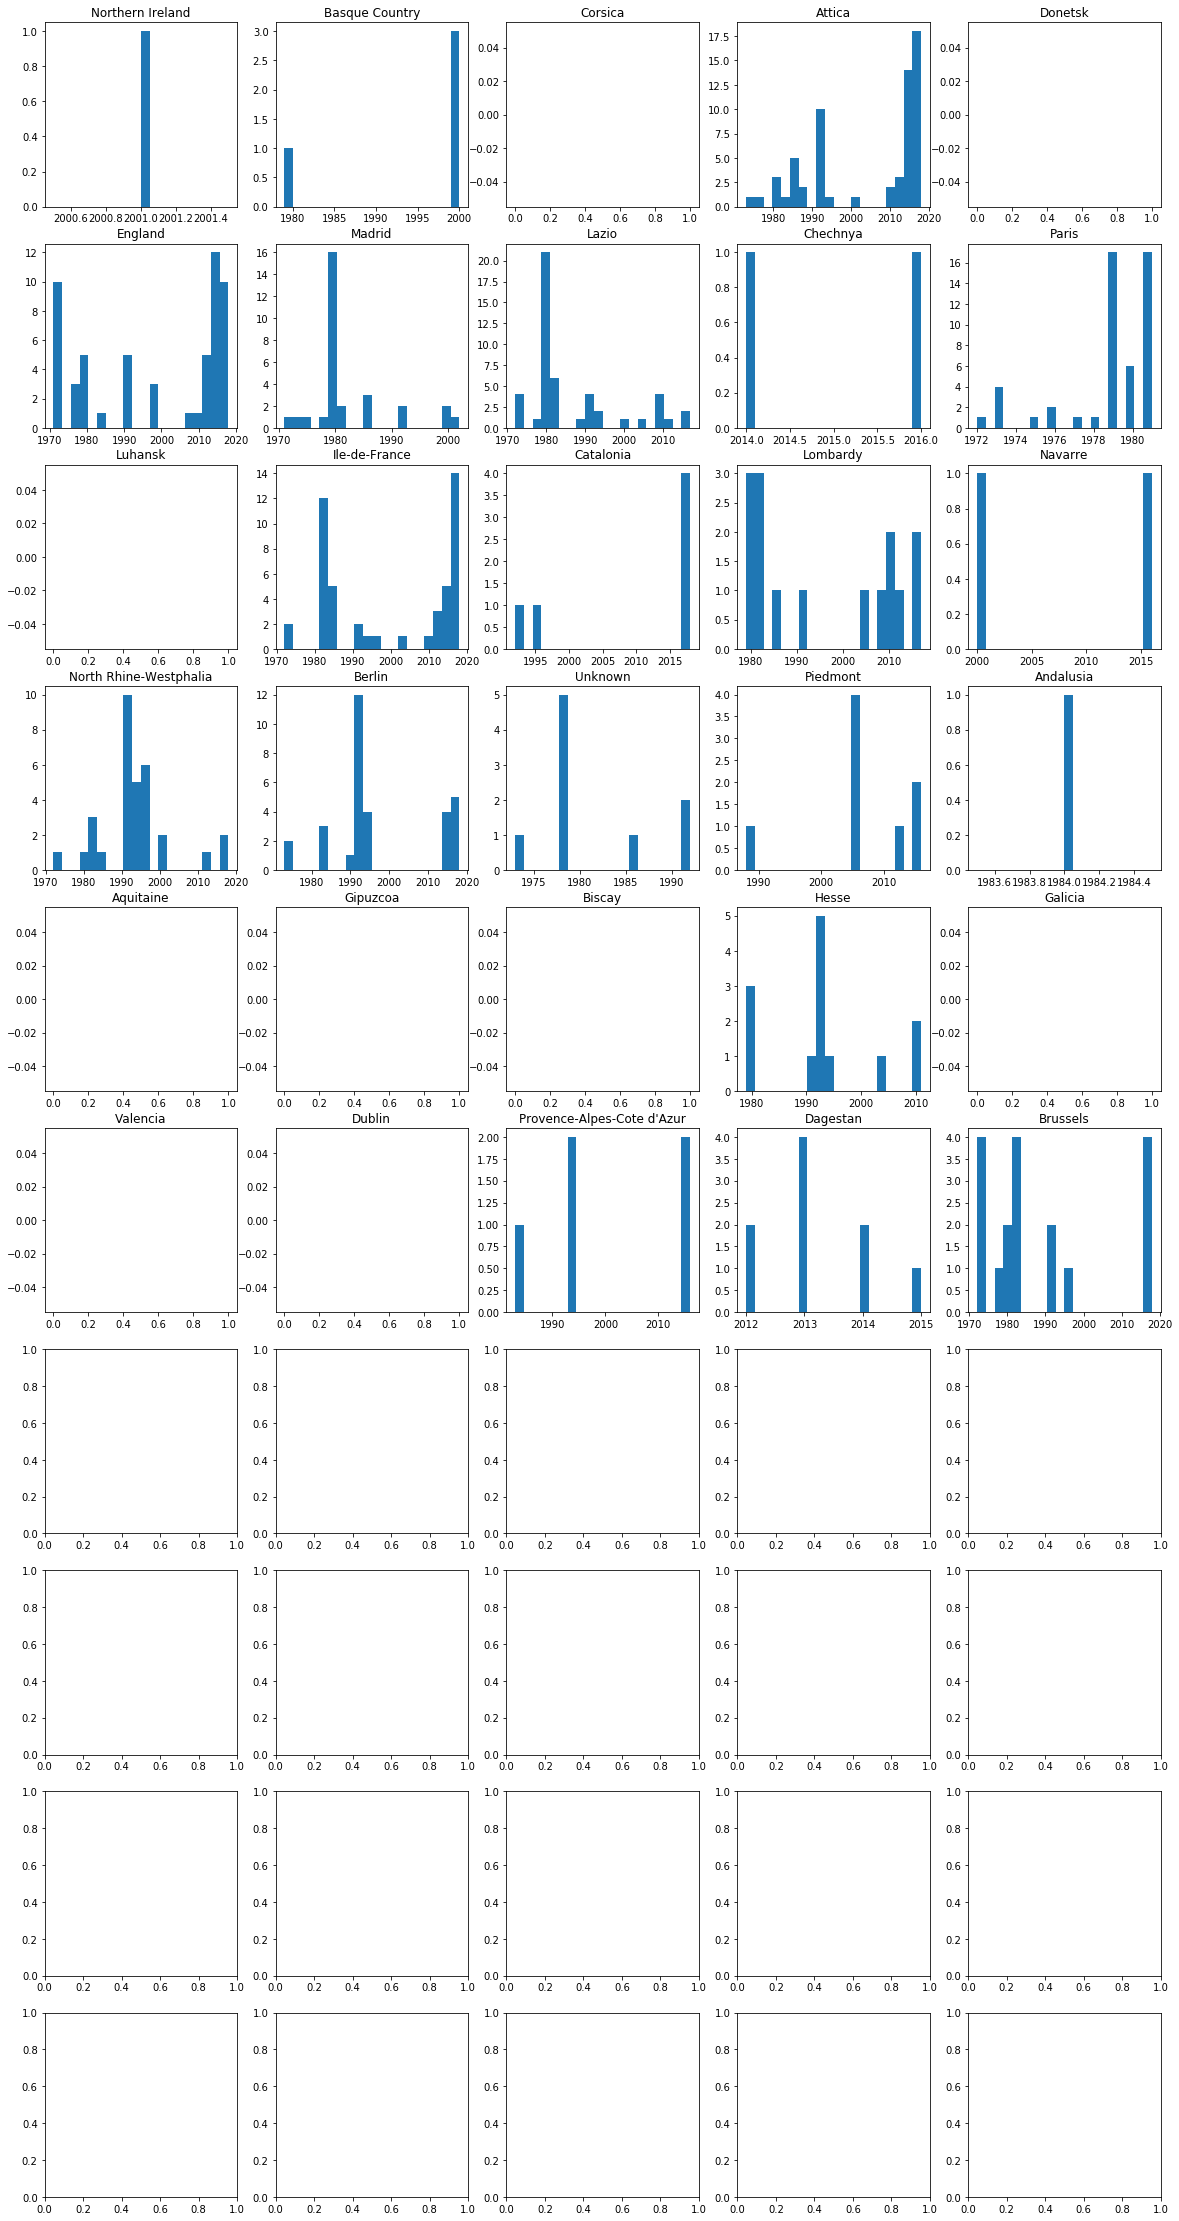

In [115]:
fig, axs = plt.subplots(10,5, figsize=(20, 40), facecolor='w', edgecolor='k')

for ax ,prov in zip(axs.ravel(),top30):
  df_grp[df_grp.provstate == prov].iyear.hist(ax=ax,grid=False,bins=20)
  ax.set_title(prov)